Nama : Fadil Febriansyah

Kode : PYTN-KS14-016

# Bank Marketing Additional Dataset

Dataset yang digunakan adalah bank-additional-full.csv yang berisi tentang direct marketing campaign dari lembaga perbankan Portugis. Tujuan klasifikasi yang dilakukan adalah untuk memprediki apakah klient atau nasabah akan berlangganan deposito berjangka atau tidak pada variabel Y

Import Library yang dibutuhkan 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

# import library untuk preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Import Library untuk balancing
from sklearn.utils import resample

# import library untuk modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# menonaktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

Membaca data set .Argumen sep=';' digunakan untuk menentukan pemisah (delimiter) yang digunakan dalam file CSV. Dalam kasus ini, pemisah yang ditentukan adalah tanda titik koma (';')

In [15]:
df = pd.read_csv('D:/Kuliah/Semester 7/Hacktiv8/Dataset/bank-additional-full.csv', sep=';')
df_bank = pd.DataFrame(df)
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Menampilkan jumlah baris dan kolom yang ada di dataset

In [17]:
df_bank.shape

(41188, 21)

Menampilkan informasi detail tentang DataFrame seperti jumlah baris data,nama-nama kolom beserta jumlah data dan tipe datanya.

In [18]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Menampilkan statistik deskriptif data yang ada di dataset

In [20]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Keterangan Bank Client Dataset

- `age` : umur klien (numeric)
- `job` : tipe pekerjaan klien (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur","student", "blue-collar", "self-employed", "retired", "technician", "services") 
- `marital` : status pernikahan klien (categorical: "unknown", "married", "divorced", "single"; catatan : "divorced" berarti bercerai atau janda)
- `education` : tingkat pendidikan klien (categorical: "unknown", "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "profesional.course", "university.degree")
- `default` : apakah pelanggan memiliki kredit dalam default? (binary: "yes", "no")
- `balance` : saldo tahunan rata-rata, dalam euro (numeric) 
- `housing` : apakah pelanggan memiliki pinjaman perumahan? (binary: "yes","no")
- `loan` : apakah pelanggan memiliki pinjaman pribadi (binary: "yes","no")

**Terkait dengan kontak terakhir dari kampanye saat ini:**
- `contact` : jenis komunikasi (categorical: "unknown", "telephone", "cellular") 
- `day` : hari kontak terakhir pada bulan tersebut (numeric)
- `month` : bulan kontak terakhir pada tahun tersebut (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- `duration` : durasi kontak terakhir, dalam detik (numeric)

**Atribut lain:**
- `campaign` : jumlah kontak yang dilakukan dengan klien selama kampanye (numeric, termasuk kontak terakhir)
- `pdays` : jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numeric, -1 berarti klien sebelumnya tidak dihubungi)
- `previous` : jumlah kontak yang dilakukan dengan klien sebelum kampanye ini (numeric)
- `poutcome` : hasil dari kampanye pemasaran sebelumnya (categorical: "unknown", "other", "failure", "success")
- `emp.var.rate` : tingkat variasi pekerjaan - indikator triwulan (numeric)
- `cons.price.idx` : indeks harga konsumen - indikator bulanan (numeric)
- `cons.conf.idx` : indeks kepercayaan konsumen - indikator bulanan (numeric)
- `euribor3m` : tarif 3 bulan euribor - indikator harian (numeric)
- `nr.employed` : jumlah karyawan - indikator triwulanan (numeric)

**Output variable (target yang diinginkan):**
- `y` : apakah klien sudah berlangganan deposito berjangka? (binary : "yes", "no")

## Data Preprocessing & Data Cleaning

Menghapus kolom yang tidak akan dipakai

In [21]:
df_bank.drop(['pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,no


Mengecek kolom apakah sudah terhapus atau belum

In [24]:
df_bank.shape

(41188, 13)

Mengecek apakah ada data missing value

In [26]:
df_bank.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
y              0
dtype: int64

Mengecek apakah ada data yang duplikat

In [27]:
df_bank.duplicated().sum()

16

Karena data duplikatnya hanya ada 16 jadi data duplikatnya di hapus

In [28]:
df_bank.drop_duplicates(inplace=True)

Mengecek kembali data duplikat

In [29]:
df_bank.duplicated().sum()

0

## Label Encoder

Proses ini Label Encoder bermanfaat ketika akan mengolah data kategorikal ke dalam format yang dapat digunakan oleh algoritma machine learning atau analisis data. Dengan LabelEncoder, Bisa mengubah kategori menjadi angka sehingga akan lebih gampang dipahami oleh machine nya atau komputernya.

In [30]:
# menginisiasi objek LabelEncoder
le = LabelEncoder()

# memilih variabel yang akan di convert dari kategorikal menjadi numerik
df_category = df_bank.select_dtypes(include='object')
le_bank = df_bank.copy()

# mengkonversi variabel kategorikal menggunakan LabelEncoder
for var in df_category:
    le_bank[var] = le.fit_transform(le_bank[var])

# menampilkan hasil data yang telah di convert
le_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,56,3,1,0,0,0,0,1,6,1,261,1,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0


In [31]:
le_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41172 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          41172 non-null  int64
 1   job          41172 non-null  int32
 2   marital      41172 non-null  int32
 3   education    41172 non-null  int32
 4   default      41172 non-null  int32
 5   housing      41172 non-null  int32
 6   loan         41172 non-null  int32
 7   contact      41172 non-null  int32
 8   month        41172 non-null  int32
 9   day_of_week  41172 non-null  int32
 10  duration     41172 non-null  int64
 11  campaign     41172 non-null  int64
 12  y            41172 non-null  int32
dtypes: int32(10), int64(3)
memory usage: 2.8 MB


## Undersampling
Dikarenakan jumlah data yang tidak seimbang antara yes dan no maka dilakukan undersampling yaitu menyamanakan jumlah data yang ada

Mengecek jumlah data yang ada di kolom y

In [32]:
df_bank['y'].value_counts()

no     36533
yes     4639
Name: y, dtype: int64

Melakukan proses under sampling dengan sample datanya diambil menjadi 4.639 data dikarenakan value yes nya memiliki data 4.639

In [33]:
# membuat 2 dataframe dari majority dan minority class 
df_majority = le_bank[(le_bank['y']==0)] 
df_minority = le_bank[(le_bank['y']==1)] 

# upsample minority class
df_majority_undersampling = resample(df_majority, replace = True, n_samples = 4639, random_state = 42)

# Combine majority class with upsampled minority class
df_undersampling = pd.concat([df_majority_undersampling, df_minority]) 

mereset indeks (index) dari DataFrame `df_undersampling` dan menghapus indeks sebelumnya.

In [34]:
df_undersampling.reset_index(inplace=True, drop=True)
df_undersampling.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,25,1,2,1,0,0,0,0,3,4,123,2,0
1,48,7,1,3,1,2,0,1,6,4,243,1,0
2,26,1,2,2,1,0,2,1,4,0,175,14,0
3,42,1,0,0,0,2,2,1,6,4,738,1,0
4,51,2,0,6,0,1,1,0,3,1,19,14,0


In [38]:
df_undersampling.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
9273,62,5,1,6,0,2,0,0,7,2,208,1,1
9274,62,5,1,6,0,0,0,0,7,2,483,2,1
9275,37,0,1,6,0,2,0,0,7,0,281,1,1
9276,73,5,1,5,0,2,0,0,7,0,334,1,1
9277,44,9,1,5,0,0,0,0,7,0,442,1,1


Mengecek apakah sudah berhasil melakukan proses undersampling atau menyeimbangkan value pada kolom y

In [35]:
df_undersampling['y'].value_counts()

0    4639
1    4639
Name: y, dtype: int64

Mengecek jumlah data setelah proses undersampling

In [36]:
df_undersampling.shape

(9278, 13)

Sesudah dilakukan under sampling dengan menyesuaikan atau menyeimbangkan antaran nilai yes yang asal nya 4.639 data dan no yang asal nya 36.533 data menjadi 4.639 pada kolom y.Jadi data yang ada di `df_undersampling` berjumlah 9278 data yang dari sebelumnya memiliki 14.188 data.

## Standard Scaler
Membagi data set menjadi 2 yaitu data latih (train) dan data uji (test) serta menghapus kolom y pada x_train dan x_test , lalu kolom y nya dimasukan kedalam y_train dan y_test.data test ini sebesar 20% dari seluruh data jadi 80% nya akan di jadikan data latih.

In [40]:
train, test = train_test_split(df_undersampling, test_size = 0.2, random_state = 42)
    
x_train = train.drop(labels='y',axis=1)
y_train = train['y']
x_test  = test.drop(labels='y',axis=1)
y_test  = test['y']

Menggunakan standard scaler yang merupakan class dari sklearn untuk melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar

In [41]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Visualisasi Data

## Bar Plot untuk yang bertipe data object

Membuat variabel kategori untuk menampung data dengan tipe data object 

In [47]:
kategori = df_bank.select_dtypes(include=['object']).columns.values

for col in kategori:
    print(col, "(", len(df_bank[col].unique()),"values):\n", np.sort(df_bank[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
y ( 2 values):
 ['no' 'yes']


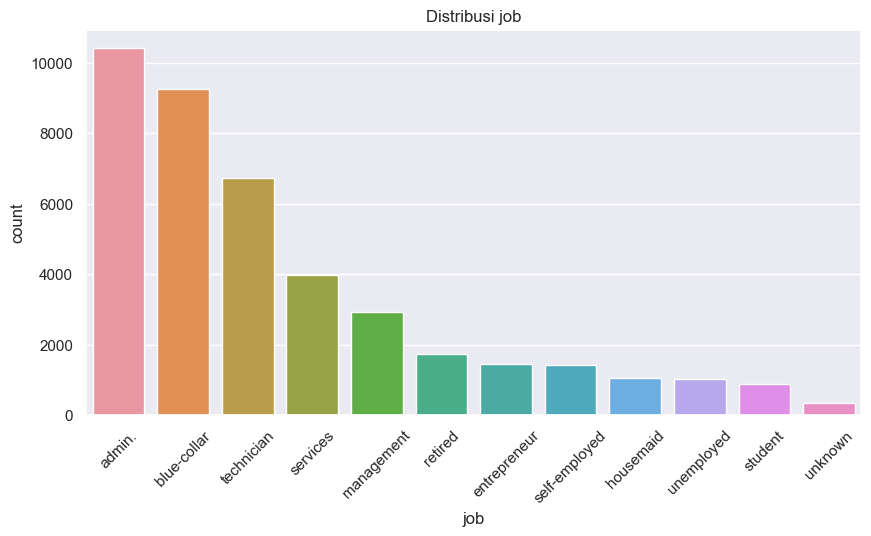

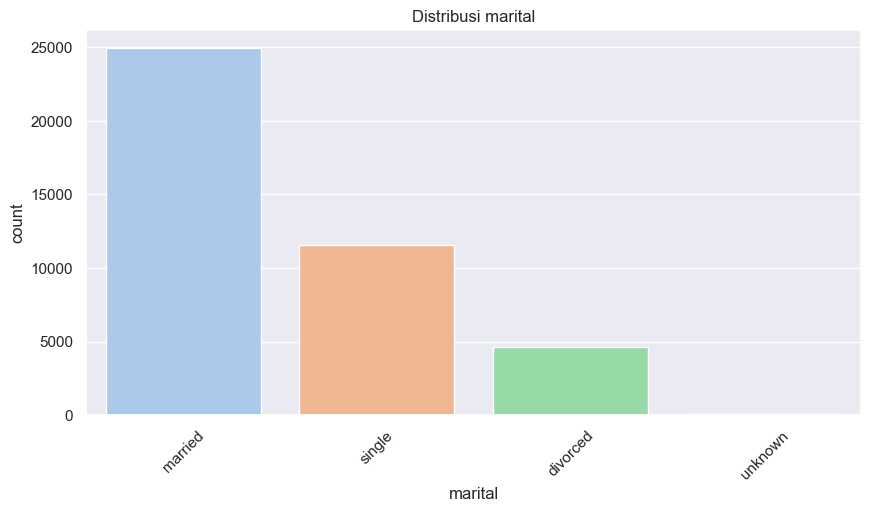

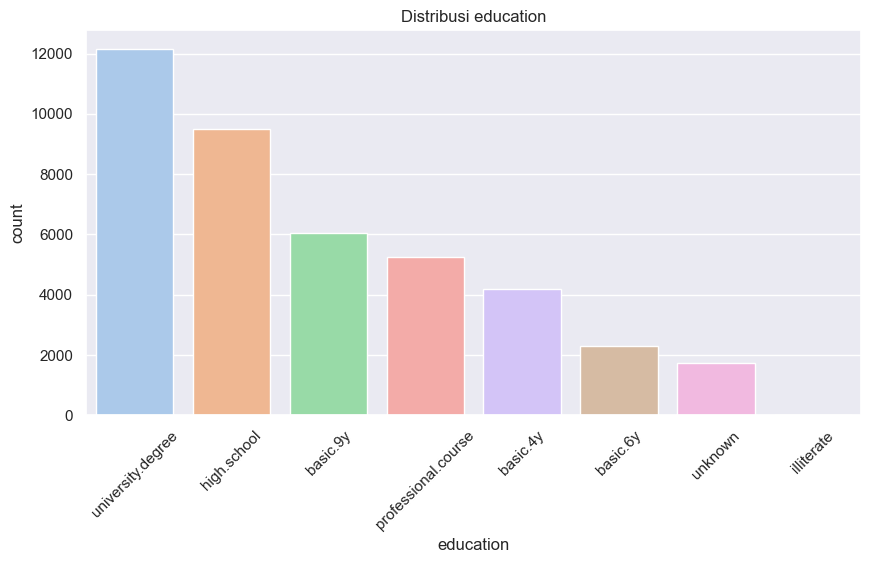

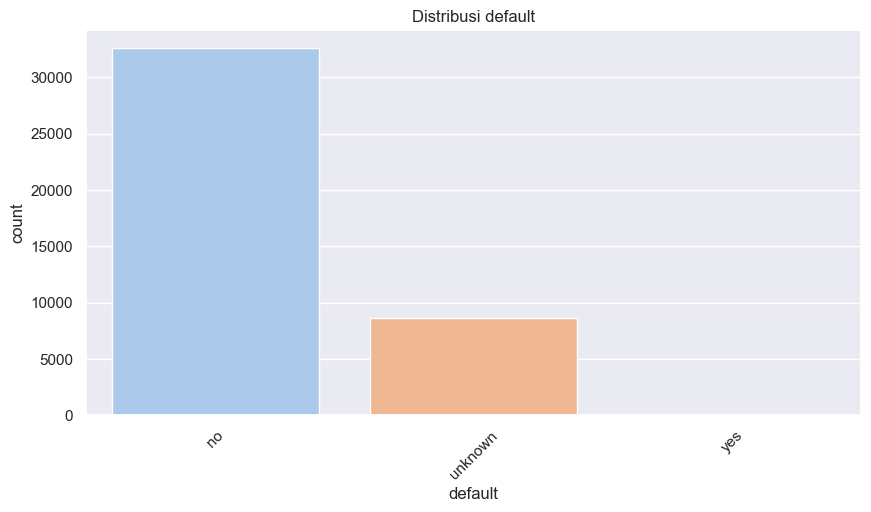

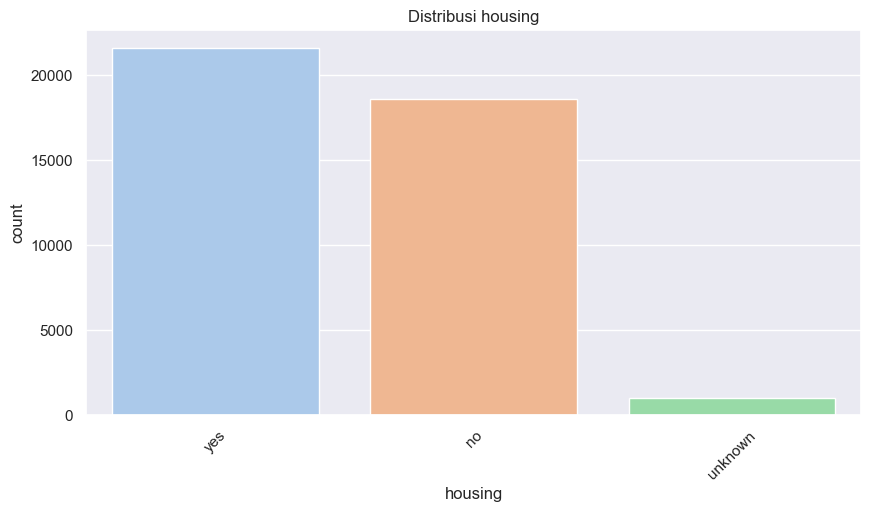

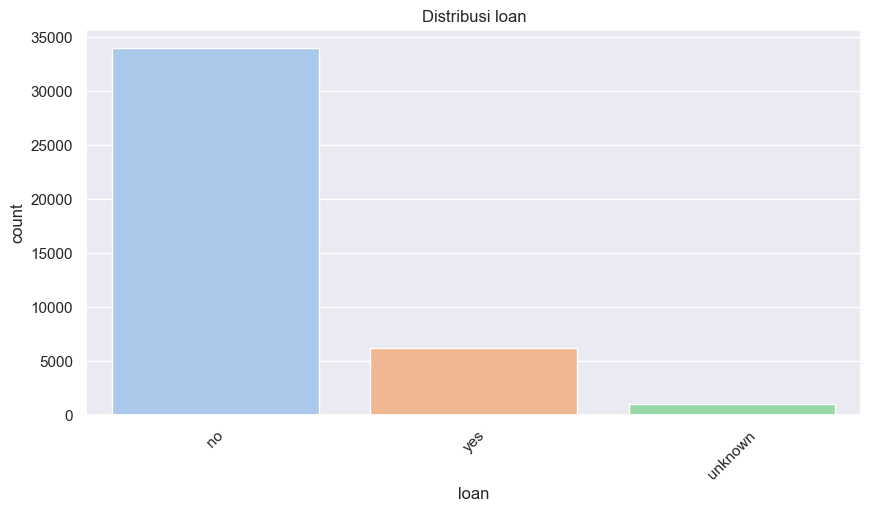

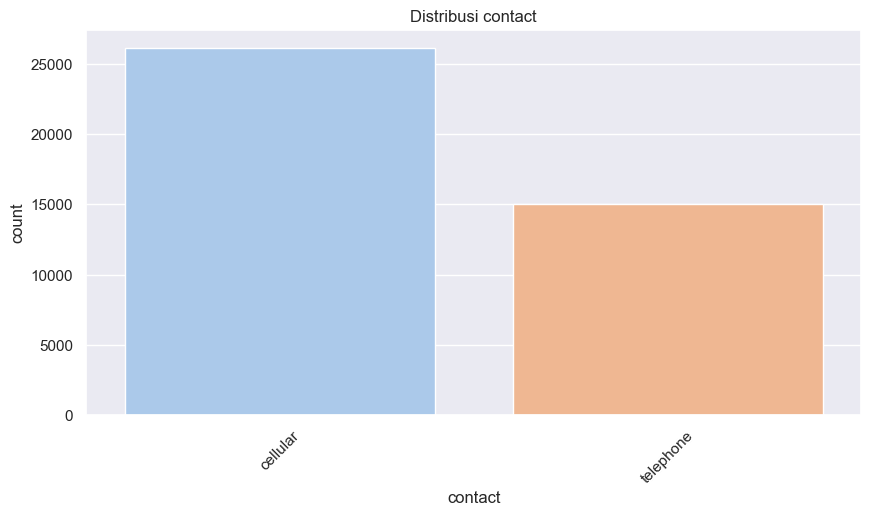

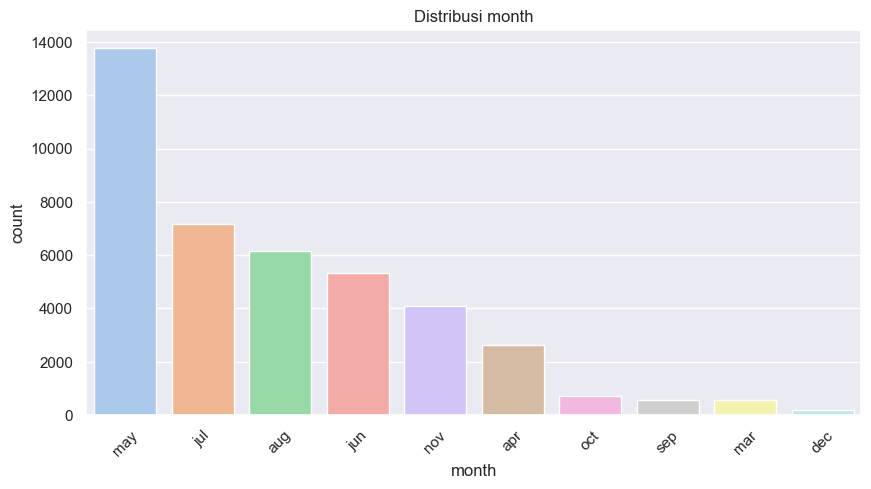

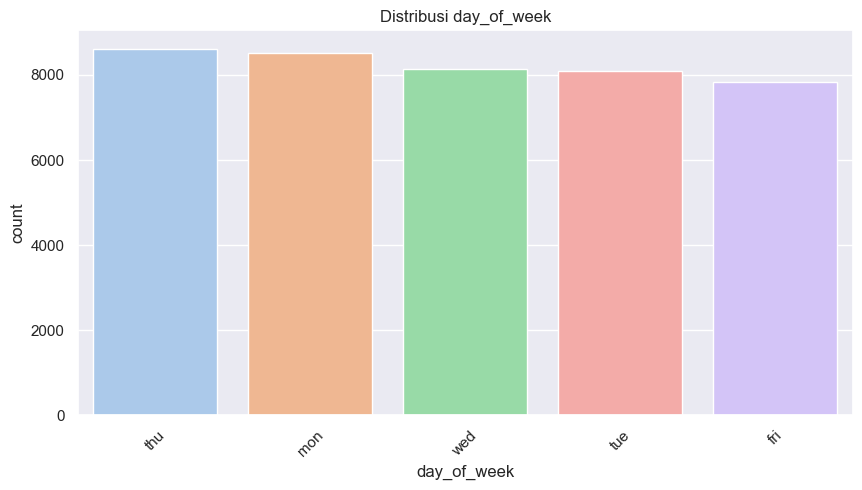

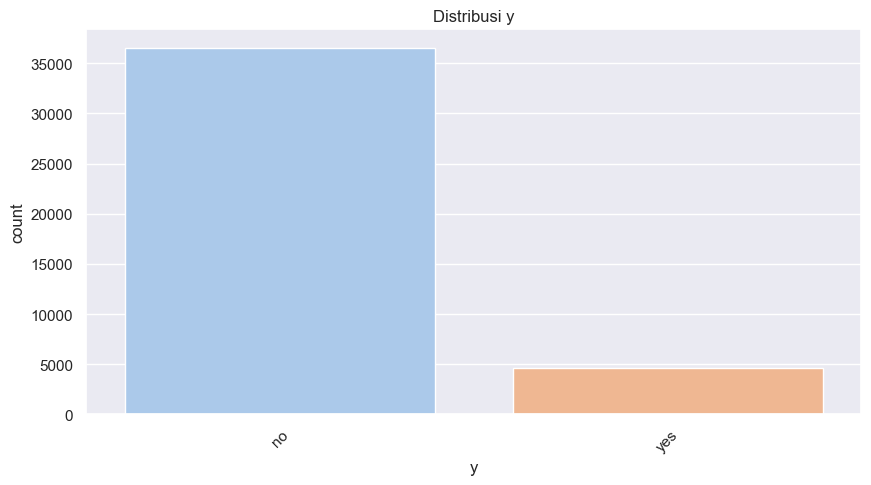

In [69]:
for col in kategori:
    plt.figure(figsize=(10, 5)) 
    sns.set(style='darkgrid', palette='pastel') 
    sns.countplot(data=df_bank, x=col, order=df_bank[col].value_counts().index)  # Membuat bar plot
    plt.title(f'Distribusi {col}') 
    plt.xticks(rotation=45) 
    plt.show()  

**Job**

Dari visualisasi distribusi pekerjaan (job) dalam dataset, beberapa kesimpulan singkat yang dapat diambil adalah:

- Mayoritas klien dalam dataset memiliki pekerjaan dalam kategori "admin.," "blue-collar," dan "technician."

- Kategori "admin." adalah yang paling umum, diikuti oleh "blue-collar" dan "technician."

- Pekerjaan "unknown" adalah yang paling jarang muncul dalam dataset.

Visualisasi ini memberikan pemahaman awal tentang profil pekerjaan klien dalam dataset dan dapat menjadi dasar untuk analisis lebih lanjut terkait dengan tipe pekerjaan dan perilaku klien.

**Marital**

Dari visualisasi distribusi status pernikahan (marital) dalam dataset, beberapa kesimpulan singkat yang dapat diambil adalah:

- Mayoritas klien dalam dataset adalah yang berstatus "married" (menikah), diikuti oleh "single" (lajang).

- Status pernikahan "divorced" (bercerai) juga cukup umum dalam dataset, meskipun jumlahnya lebih rendah daripada yang "married" dan "single."

- Terdapat sejumlah kecil data dengan status pernikahan "unknown."

Visualisasi ini memberikan wawasan awal tentang distribusi status pernikahan klien dalam dataset dan dapat menjadi dasar untuk analisis lebih lanjut terkait dengan status pernikahan dan perilaku klien.

**Education**

Dari visualisasi distribusi tingkat pendidikan (education) dalam dataset, beberapa kesimpulan singkat yang dapat diambil adalah:

- Mayoritas klien dalam dataset memiliki tingkat pendidikan "university.degree" (gelar universitas) atau "high.school" (sekolah menengah atas).

- "university.degree" adalah tingkat pendidikan paling umum di antara klien, dengan lebih dari 12.000 orang.

- "illiterate" (buta huruf) adalah kategori yang paling jarang muncul dalam dataset, hanya dengan 18 orang.

- Terdapat sejumlah data dengan tingkat pendidikan "unknown," yang menunjukkan ketidakpastian atau ketidaktersediaan informasi tentang pendidikan klien.

Visualisasi ini memberikan pemahaman awal tentang profil tingkat pendidikan klien dalam dataset dan dapat menjadi dasar untuk analisis lebih lanjut terkait dengan tingkat pendidikan dan perilaku klien.

**Default**

Dari visualisasi distribusi kolom "default" (apakah klien memiliki kredit dalam default) dalam dataset, beberapa kesimpulan singkat yang dapat diambil adalah:

- Mayoritas klien dalam dataset tidak memiliki kredit dalam default ("no"), dengan jumlah yang signifikan, yaitu 32.574 orang.

- Terdapat jumlah yang cukup besar dari data yang memiliki status "unknown" untuk kolom "default," yang menunjukkan ketidakpastian atau ketidaktersediaan informasi mengenai status kredit dalam default.

- Hanya ada sedikit data yang memiliki status "yes" (3 orang) dalam kolom "default." Hal ini menunjukkan bahwa mayoritas klien dalam dataset tidak memiliki kredit dalam default.

Visualisasi ini memberikan pemahaman awal tentang distribusi status kredit dalam default klien dalam dataset dan dapat digunakan sebagai dasar untuk analisis lebih lanjut terkait dengan pengaruh status ini terhadap hasil kampanye pemasaran atau perilaku klien.

**Housing**

Dari visualisasi distribusi kolom "housing" (apakah klien memiliki pinjaman perumahan) dalam dataset, beberapa kesimpulan singkat yang dapat diambil adalah:

- Sebagian besar klien dalam dataset memiliki pinjaman perumahan ("yes"), dengan jumlah sekitar 21.569 orang.

- Ada juga sejumlah klien yang tidak memiliki pinjaman perumahan ("no"), dengan jumlah sekitar 18.613 orang.

- Terdapat sejumlah data yang memiliki status "unknown" untuk kolom "housing," yang menunjukkan ketidakpastian atau ketidaktersediaan informasi mengenai kepemilikan pinjaman perumahan.

Visualisasi ini memberikan pemahaman awal tentang seberapa besar andil klien yang memiliki atau tidak memiliki pinjaman perumahan dalam dataset, serta tingkat ketidakpastian dalam data tersebut. Informasi ini dapat menjadi dasar untuk analisis lebih lanjut terkait dengan kepemilikan pinjaman perumahan dan pengaruhnya terhadap perilaku klien.

**Loan**

Dari visualisasi distribusi kolom "loan" (apakah klien memiliki pinjaman pribadi) dalam dataset, beberapa kesimpulan singkat yang dapat diambil adalah:

- Mayoritas klien dalam dataset tidak memiliki pinjaman pribadi ("no"), dengan jumlah yang signifikan, yaitu 33.934 orang.

- Sejumlah klien memiliki pinjaman pribadi ("yes"), meskipun jumlahnya lebih rendah, yaitu sekitar 6.248 orang.

- Terdapat sejumlah data yang memiliki status "unknown" untuk kolom "loan," yang menunjukkan ketidakpastian atau ketidaktersediaan informasi mengenai kepemilikan pinjaman pribadi.

Visualisasi ini memberikan pemahaman awal tentang seberapa besar andil klien yang memiliki atau tidak memiliki pinjaman pribadi dalam dataset, serta tingkat ketidakpastian dalam data tersebut. Informasi ini dapat digunakan sebagai dasar untuk analisis lebih lanjut terkait dengan kepemilikan pinjaman pribadi dan pengaruhnya terhadap perilaku klien.

**Month**

Dari visualisasi distribusi kolom "month" (bulan kontak terakhir) dalam dataset, beberapa kesimpulan singkat yang dapat diambil adalah:

- Bulan "May" adalah bulan dengan jumlah kontak terakhir terbanyak dalam dataset, dengan lebih dari 13.000 kontak.

- Bulan-bulan "July" dan "August" adalah bulan-bulan yang juga cukup umum, dengan lebih dari 7.000 kontak terakhir.

- Bulan-bulan seperti "December," "March," "September," "October," dan "April" memiliki jumlah kontak terakhir yang lebih rendah dibandingkan dengan bulan-bulan lainnya.

- "December" adalah bulan dengan jumlah kontak terakhir yang paling sedikit dalam dataset, dengan hanya 182 kontak.

Visualisasi ini memberikan pemahaman awal tentang distribusi bulan kontak terakhir dalam dataset. Informasi ini dapat digunakan sebagai dasar untuk analisis lebih lanjut terkait dengan hubungan antara bulan kontak dan hasil kampanye pemasaran atau perilaku klien.

**Day_of_week**

Dari visualisasi distribusi kolom "day_of_week" (hari kontak terakhir) dalam dataset, beberapa kesimpulan singkat yang dapat diambil adalah:

- Hari "Thursday" (Kamis) adalah hari dengan jumlah kontak terakhir terbanyak dalam dataset, dengan sekitar 8.617 kontak.

- Hari "Monday" (Senin) memiliki jumlah kontak terakhir yang hampir setara dengan Kamis, yaitu sekitar 8.512 kontak.

- "Wednesday" (Rabu) dan "Tuesday" (Selasa) memiliki jumlah kontak terakhir yang mendekati jumlah Senin dan Kamis.

- "Friday" (Jumat) adalah hari dengan jumlah kontak terakhir yang sedikit lebih rendah dibandingkan dengan hari-hari lainnya, dengan sekitar 7.826 kontak.

Visualisasi ini memberikan pemahaman awal tentang distribusi hari kontak terakhir dalam dataset. Informasi ini dapat digunakan sebagai dasar untuk analisis lebih lanjut terkait dengan hubungan antara hari kontak dan hasil kampanye pemasaran atau perilaku klien.

**Y**

Dari visualisasi distribusi kolom "y" (apakah klien sudah berlangganan deposito berjangka) dalam dataset, beberapa kesimpulan singkat yang dapat diambil adalah:

- Mayoritas klien dalam dataset belum berlangganan deposito berjangka ("no"), dengan jumlah yang signifikan, yaitu 36.533 orang.

- Sejumlah kecil klien telah berlangganan deposito berjangka ("yes"), dengan jumlah sekitar 4.639 orang.

Visualisasi ini memberikan pemahaman awal tentang distribusi variabel target "y" dalam dataset. Hal ini mengindikasikan bahwa dataset cenderung tidak seimbang (imbalanced), dengan mayoritas klien tidak berlangganan deposito berjangka. Hal ini penting untuk dipertimbangkan dalam analisis atau pemodelan lebih lanjut, terutama jika Anda akan melakukan klasifikasi atau prediksi terkait dengan berlangganan deposito.

### Histogram dari seluruh kolom

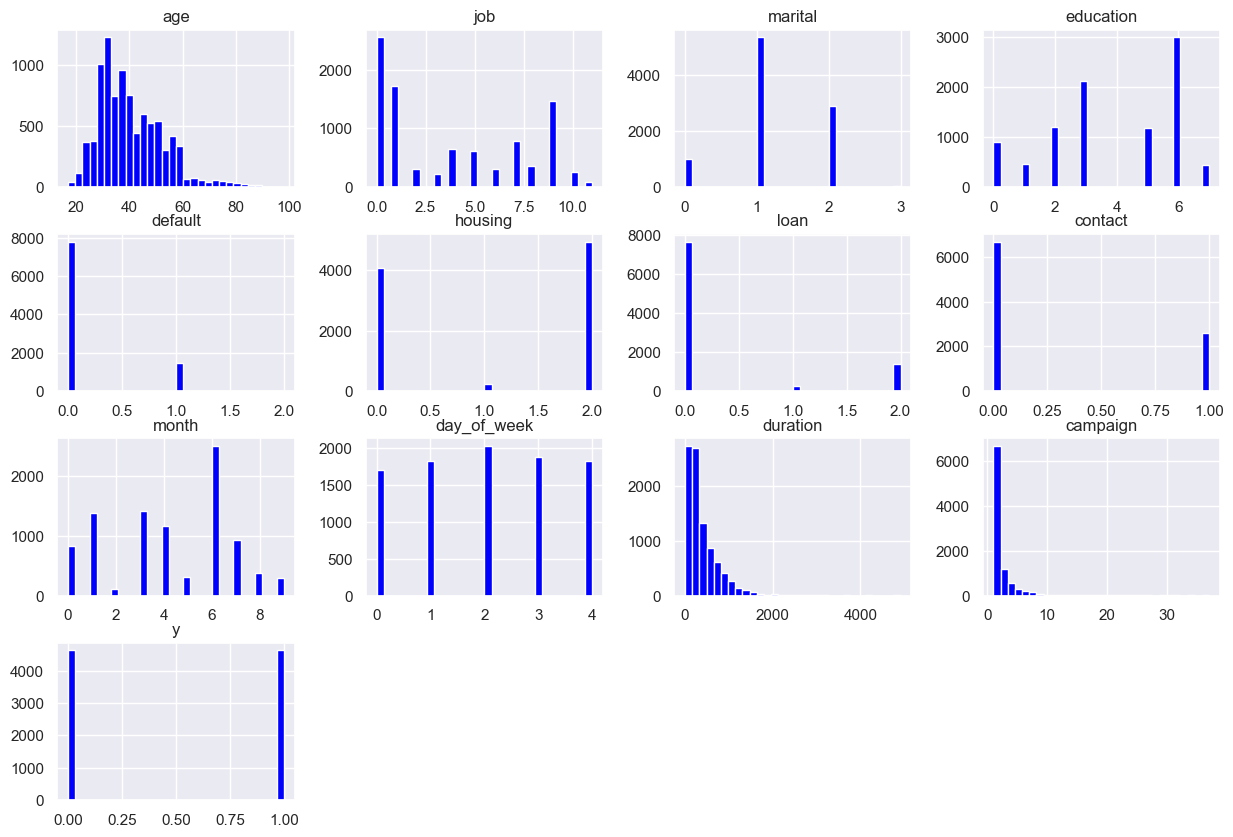

In [66]:
df_undersampling.hist(bins=30, figsize=(15,10), color='blue')
plt.show()

In [270]:
print(df_undersampling)

      age  job  marital  education  default  housing  loan  contact  month  \
0      25    1        2          1        0        0     0        0      3   
1      48    7        1          3        1        2     0        1      6   
2      26    1        2          2        1        0     2        1      4   
3      42    1        0          0        0        2     2        1      6   
4      51    2        0          6        0        1     1        0      3   
5      47    6        1          6        0        0     0        0      1   
6      27    7        2          3        0        2     0        0      3   
7      35    0        1          5        0        2     2        1      6   
8      38    1        1          1        0        1     1        1      6   
9      58    5        0          5        1        2     0        1      6   
10     57    9        1          5        0        0     0        1      6   
11     35    9        1          5        0        2     0      

In [269]:
korelasi = df_undersampling.corr()
print(korelasi)

                  age       job   marital  education   default   housing  \
age          1.000000 -0.018225 -0.430470  -0.154233  0.117312  0.006285   
job         -0.018225  1.000000  0.041094   0.086406 -0.031803  0.022541   
marital     -0.430470  0.041094  1.000000   0.120007 -0.073939  0.007015   
education   -0.154233  0.086406  0.120007   1.000000 -0.181153  0.031548   
default      0.117312 -0.031803 -0.073939  -0.181153  1.000000 -0.029587   
housing      0.006285  0.022541  0.007015   0.031548 -0.029587  1.000000   
loan        -0.005827  0.010486 -0.008066  -0.009094 -0.002838  0.041133   
contact     -0.010218 -0.036513 -0.047183  -0.098904  0.178071 -0.071994   
month       -0.022405 -0.020937  0.002370  -0.057090 -0.005121 -0.042824   
day_of_week  0.001211 -0.019919 -0.001721  -0.011357 -0.031511 -0.007777   
duration    -0.017459 -0.012127  0.000114  -0.022659  0.006203 -0.016407   
campaign    -0.006078 -0.002313 -0.014616  -0.008773  0.045164  0.000746   
y           

### Heatmap untuk melihat korelasi antar atribut data

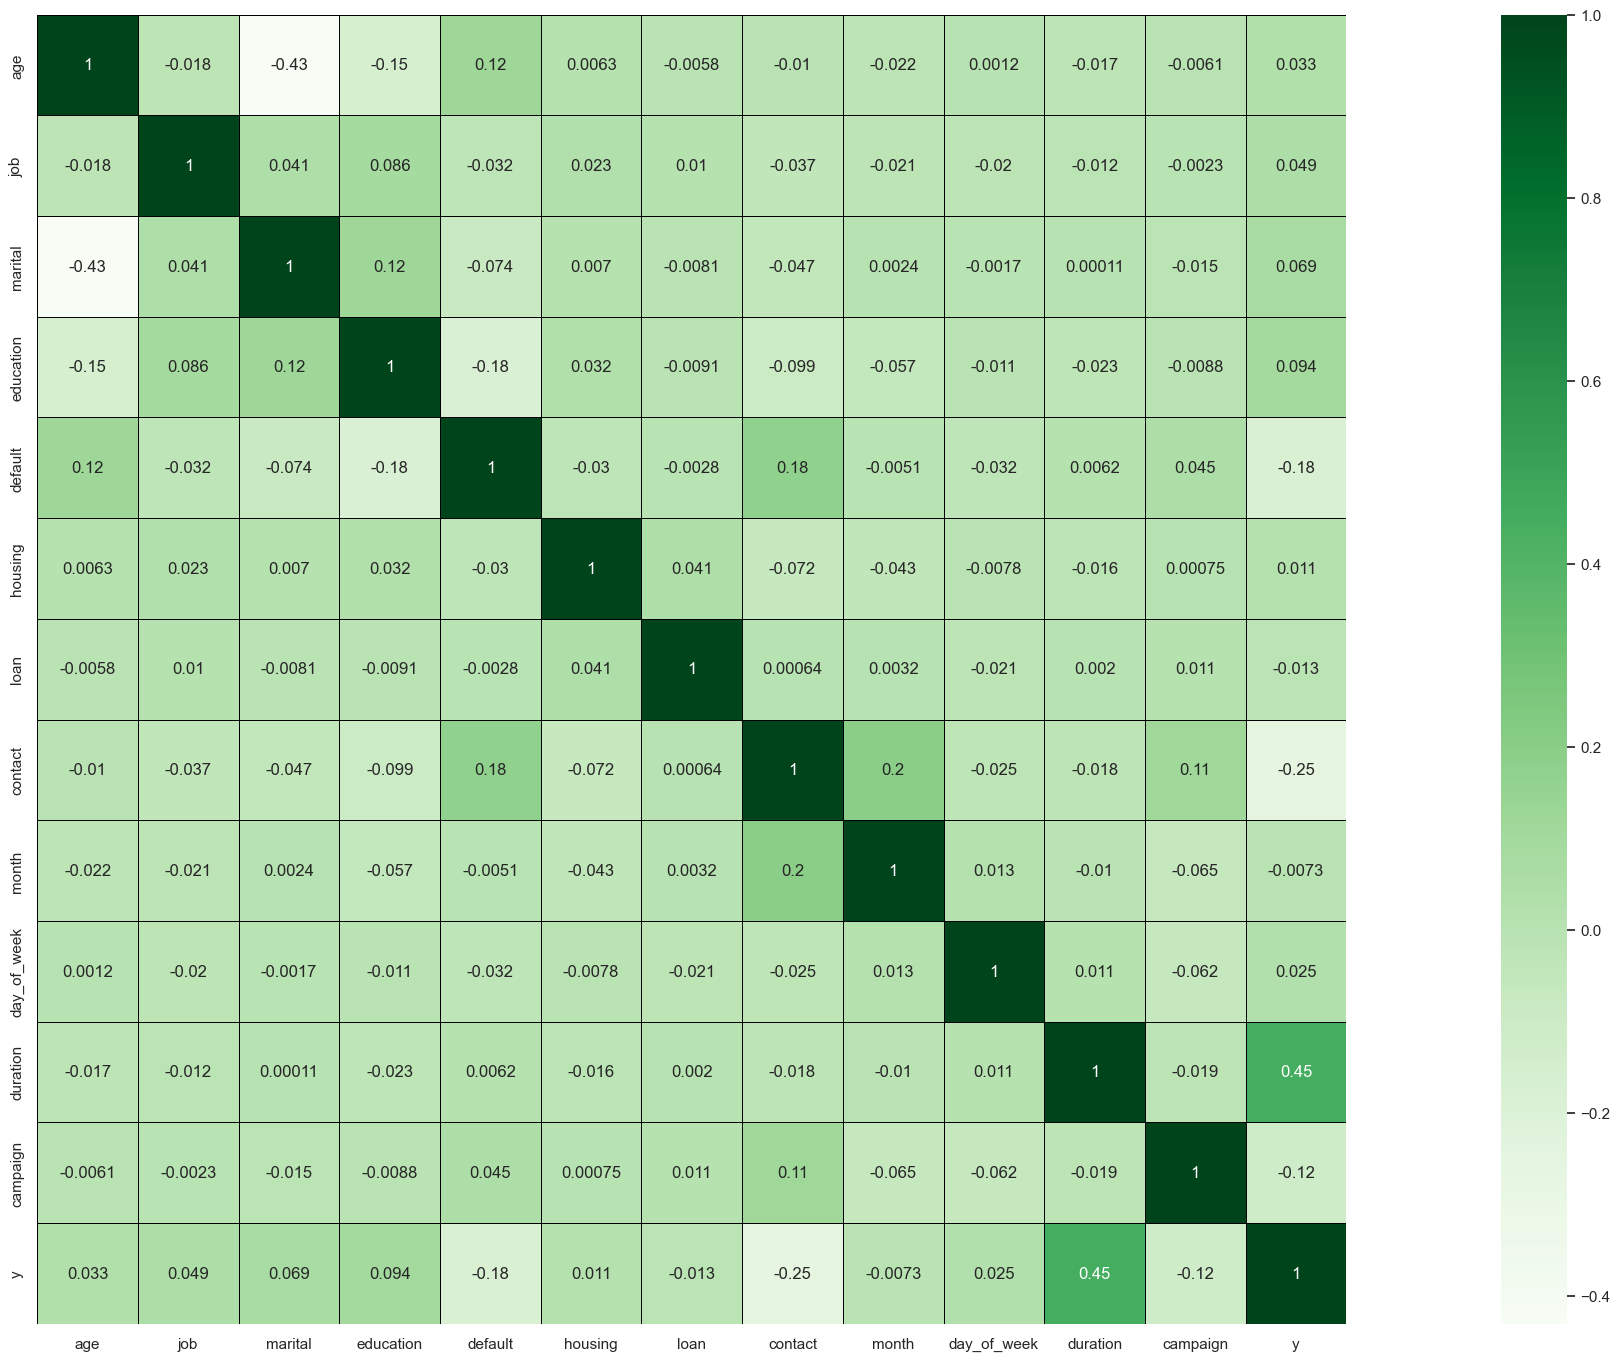

In [88]:
plt.figure(figsize=(40, 17))
sns.heatmap(df_undersampling.corr(), annot=True, cmap='Greens', linewidths=.5, linecolor='black', square=True)
plt.show()

**Kesimpulan**

Beberapa poin penting dari heatmap diatas:

- Kolom "duration" memiliki korelasi positif yang kuat (0.4488) dengan kolom target "y". Ini menunjukkan bahwa durasi panggilan memiliki pengaruh yang signifikan terhadap keputusan pelanggan untuk menerima atau menolak tawaran.

- Kolom "contact" memiliki korelasi negatif yang kuat (-0.2469) dengan kolom target "y". Ini mengindikasikan bahwa metode kontak tertentu cenderung memiliki dampak negatif pada keputusan pelanggan.

- Kolom "default" dan "education" juga memiliki korelasi negatif dengan kolom target "y", meskipun tidak sekuat "duration" dan "contact".

- Kolom "age," "job," "marital," "housing," "loan," "month," dan "day_of_week" tampaknya memiliki korelasi yang relatif rendah dengan Kolom target "y."

## Logistic Regression

Membuat sebuah objek model Regresi Logistik yang akan digunakan untuk melakukan klasifikasi dan Melatih model Regresi Logistik menggunakan data pelatihan

In [225]:
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

LogisticRegression()

Menggunakan model yang telah dilatih, dilakukan prediksi pada data pengujian `x_test_scaled`

In [227]:
y_pred1 = lr.predict(x_test_scaled)

Menghitung akurasi dari prediksi yang telah dibuat dan mencetak nilainya dan 
Membuat matriks konfusi (confusion matrix) untuk mengevaluasi kinerja model. 

In [228]:
acclr = print(accuracy_score(y_test,y_pred1))
matrix1=confusion_matrix(y_test,y_pred1)
print(matrix1)

0.7839439655172413
[[739 186]
 [215 716]]


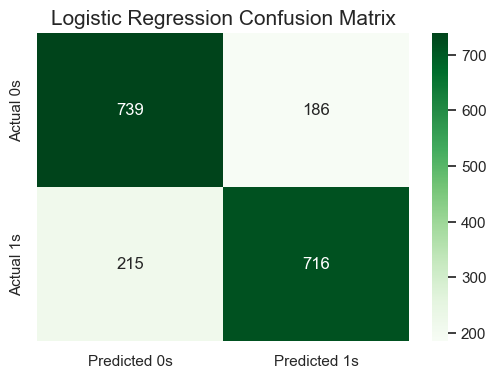

In [229]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Logistic Regression Confusion Matrix", fontsize=15)
sns.heatmap(matrix1, annot=True, cmap='Greens', fmt='g',
            xticklabels=('Predicted 0s', 'Predicted 1s'),
            yticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

**Kesimpulan Logistic Regression**

Output dari evaluasi model Logistic Regression pada data pengujian. Berikut adalah penjelasan dan ringkasan dari output tersebut:

- Akurasi (Accuracy): Nilai akurasi model Logistic Regression adalah sekitar 0.7839, atau sekitar 78.39%. Akurasi mengukur sejauh mana model mampu memprediksi kelas target dengan benar. Dalam konteks ini, model Logistic Regression memprediksi dengan benar sekitar 78.39% dari seluruh sampel data pengujian.

Selain akurasi, terdapat empat angka dalam matriks kebingungan (confusion matrix), yang memberikan wawasan lebih lanjut tentang kinerja model:

- True Positives (TP): Jumlah prediksi yang benar ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 739.
- False Negatives (FN): Jumlah prediksi yang salah ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 186.
- False Positives (FP): Jumlah prediksi yang salah ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 215.
- True Negatives (TN): Jumlah prediksi yang benar ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 716.

Ringkasan:

Model Logistic Regression memiliki akurasi sekitar 74.84%. Dari matriks kebingungan, kita dapat melihat bahwa model memiliki 739 prediksi benar untuk kelas positif dan 716 prediksi benar untuk kelas negatif. Namun, terdapat 186 prediksi salah untuk kelas positif dan 215 prediksi salah untuk kelas negatif. Ini memberikan gambaran tentang seberapa baik model dapat membedakan antara kelas positif dan negatif.

## K-Nearest Neighbor

Membuat sebuah objek model Regresi Logistik yang akan digunakan untuk melakukan klasifikasi dan Melatih model Regresi Logistik menggunakan data pelatihan

In [230]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

Menggunakan model yang telah dilatih, dilakukan prediksi pada data pengujian `x_test_scaled`

In [231]:
y_pred2 = knn.predict(x_test_scaled)

Menghitung akurasi dari prediksi yang telah dibuat dan mencetak nilainya dan 
Membuat matriks konfusi (confusion matrix) untuk mengevaluasi kinerja model. 

In [232]:
acknn = print(accuracy_score(y_test,y_pred2))
matrix2=confusion_matrix(y_test,y_pred2)
print(matrix2)

0.7483836206896551
[[722 203]
 [264 667]]


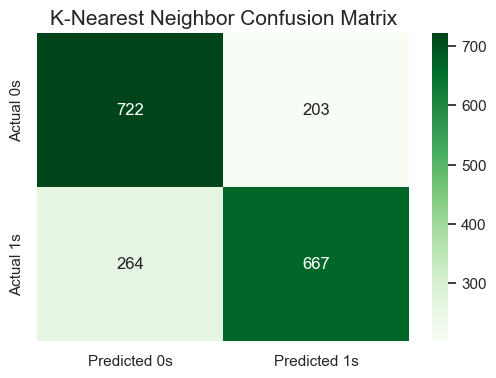

In [233]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("K-Nearest Neighbor Confusion Matrix", fontsize=15)
sns.heatmap(matrix2, annot=True, cmap='Greens', fmt='g',
            xticklabels=('Predicted 0s', 'Predicted 1s'),
            yticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

**Kesimpulan K-Nearest Neighbor**

Output dari evaluasi model K-Nearest Neighbors pada data pengujian. Berikut adalah penjelasan dan ringkasan dari output tersebut:

- Akurasi (Accuracy): Nilai akurasi model K-Nearest Neighbors adalah sekitar 0.7484, atau sekitar 74.84%. Akurasi mengukur sejauh mana model mampu memprediksi kelas target dengan benar. Dalam konteks ini, model K-Nearest Neighbors memprediksi dengan benar sekitar 74.84% dari seluruh sampel data pengujian.

Selain akurasi, terdapat empat angka dalam matriks kebingungan (confusion matrix), yang memberikan wawasan lebih lanjut tentang kinerja model:

- True Positives (TP): Jumlah prediksi yang benar ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 722.
- False Negatives (FN): Jumlah prediksi yang salah ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 203.
- False Positives (FP): Jumlah prediksi yang salah ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 264.
- True Negatives (TN): Jumlah prediksi yang benar ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 667.

Ringkasan:

Model K-Nearest Neighbors memiliki akurasi sekitar 74.84%. Dari matriks kebingungan, kita dapat melihat bahwa model memiliki 722 prediksi benar untuk kelas positif dan 667 prediksi benar untuk kelas negatif. Namun, terdapat 203 prediksi salah untuk kelas positif dan 264 prediksi salah untuk kelas negatif. Ini memberikan gambaran tentang seberapa baik model dapat membedakan antara kelas positif dan negatif.

## Support Vector Machine (SVM)

Membuat sebuah objek model Regresi Logistik yang akan digunakan untuk melakukan klasifikasi dan Melatih model Regresi Logistik menggunakan data pelatihan

In [234]:
svm = SVC()
svm.fit(x_train_scaled, y_train)

SVC()

Menggunakan model yang telah dilatih, dilakukan prediksi pada data pengujian `x_test_scaled`

In [235]:
y_pred3 = svm.predict(x_test_scaled)

Menghitung akurasi dari prediksi yang telah dibuat dan mencetak nilainya dan 
Membuat matriks konfusi (confusion matrix) untuk mengevaluasi kinerja model. 

In [236]:
acsvm = print(accuracy_score(y_test,y_pred3))
matrix3=confusion_matrix(y_test,y_pred3)
print(matrix3)

0.8098060344827587
[[728 197]
 [156 775]]


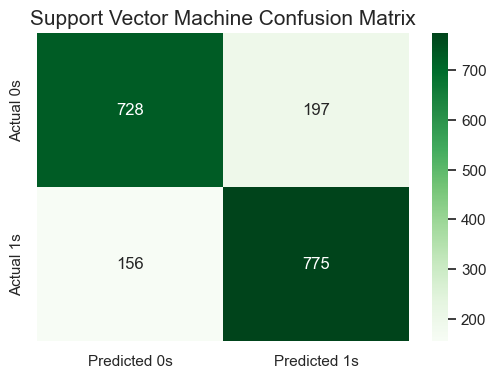

In [237]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Support Vector Machine Confusion Matrix", fontsize=15)
sns.heatmap(matrix3, annot=True, cmap='Greens', fmt='g',
            xticklabels=('Predicted 0s', 'Predicted 1s'),
            yticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

**Kesimpulan Support Vector Machine**

Output dari evaluasi model Support Vector Machines pada data pengujian. Berikut adalah penjelasan dan ringkasan dari output tersebut:

- Akurasi (Accuracy): Nilai akurasi model Support Vector Machine adalah sekitar 0.8089, atau sekitar 80.89%. Akurasi mengukur sejauh mana model mampu memprediksi kelas target dengan benar. Dalam konteks ini, model Support Vector Machines memprediksi dengan benar sekitar 80.89% dari seluruh sampel data pengujian.

Selain akurasi, terdapat empat angka dalam matriks kebingungan (confusion matrix), yang memberikan wawasan lebih lanjut tentang kinerja model:

- True Positives (TP): Jumlah prediksi yang benar ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 728.
- False Negatives (FN): Jumlah prediksi yang salah ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 197.
- False Positives (FP): Jumlah prediksi yang salah ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 156.
- True Negatives (TN): Jumlah prediksi yang benar ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 775.

Ringkasan:

Model Support Vector Machines memiliki akurasi sekitar 80.89%. Dari matriks kebingungan, kita dapat melihat bahwa model memiliki 728 prediksi benar untuk kelas positif dan 775 prediksi benar untuk kelas negatif. Namun, terdapat 197 prediksi salah untuk kelas positif dan 156 prediksi salah untuk kelas negatif. Ini memberikan gambaran tentang seberapa baik model dapat membedakan antara kelas positif dan negatif.

## Decision Tree

Membuat sebuah objek model Regresi Logistik yang akan digunakan untuk melakukan klasifikasi dan Melatih model Regresi Logistik menggunakan data pelatihan

In [264]:
dct = DecisionTreeClassifier()
dct.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

Menggunakan model yang telah dilatih, dilakukan prediksi pada data pengujian `x_test_scaled`

In [267]:
y_pred4 = dtc.predict(x_test_scaled)

Menghitung akurasi dari prediksi yang telah dibuat dan mencetak nilainya dan 
Membuat matriks konfusi (confusion matrix) untuk mengevaluasi kinerja model. 

In [268]:
acdct = print(accuracy_score(y_test,y_pred4))
matrix4=confusion_matrix(y_test,y_pred4)
print(matrix4)

0.7850215517241379
[[746 179]
 [220 711]]


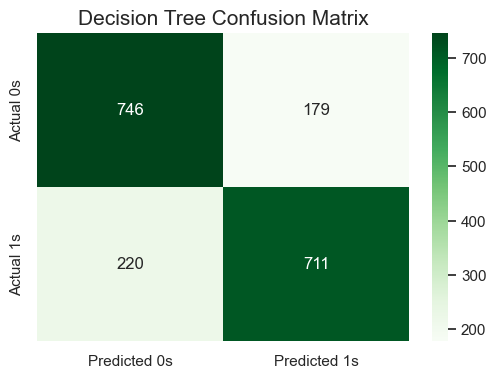

In [241]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Decision Tree Confusion Matrix", fontsize=15)
sns.heatmap(matrix4, annot=True, cmap='Greens', fmt='g',
            xticklabels=('Predicted 0s', 'Predicted 1s'),
            yticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

**Kesimpulan Decision Tree**

Output dari evaluasi model Decision Tree pada data pengujian. Berikut adalah penjelasan dan ringkasan dari output tersebut:

- Akurasi (Accuracy): Nilai akurasi model Decision Tree adalah sekitar 0.7850, atau sekitar 78.50%. Akurasi mengukur sejauh mana model mampu memprediksi kelas target dengan benar. Dalam konteks ini, model Decision Tree memprediksi dengan benar sekitar 78.50% dari seluruh sampel data pengujian.

Selain akurasi, terdapat empat angka dalam matriks kebingungan (confusion matrix), yang memberikan wawasan lebih lanjut tentang kinerja model:

- True Positives (TP): Jumlah prediksi yang benar ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 746.
- False Negatives (FN): Jumlah prediksi yang salah ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 179.
- False Positives (FP): Jumlah prediksi yang salah ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 220.
- True Negatives (TN): Jumlah prediksi yang benar ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 711.

Ringkasan:

Model Decision Tree memiliki akurasi sekitar 78.50%. Dari matriks kebingungan, kita dapat melihat bahwa model memiliki 746 prediksi benar untuk kelas positif dan 711 prediksi benar untuk kelas negatif. Namun, terdapat 179 prediksi salah untuk kelas positif dan 220 prediksi salah untuk kelas negatif. Ini memberikan gambaran tentang seberapa baik model dapat membedakan antara kelas positif dan negatif.


## Random Forest

Membuat sebuah objek model Regresi Logistik yang akan digunakan untuk melakukan klasifikasi dan Melatih model Regresi Logistik menggunakan data pelatihan

In [243]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

Menggunakan model yang telah dilatih, dilakukan prediksi pada data pengujian `x_test_scaled`

In [244]:
y_pred5 = rf.predict(x_test_scaled)

Menghitung akurasi dari prediksi yang telah dibuat dan mencetak nilainya dan 
Membuat matriks konfusi (confusion matrix) untuk mengevaluasi kinerja model. 

In [245]:
acrf = print(accuracy_score(y_test,y_pred5))
matrix5=confusion_matrix(y_test,y_pred5)
print(matrix5)

0.853448275862069
[[767 158]
 [114 817]]


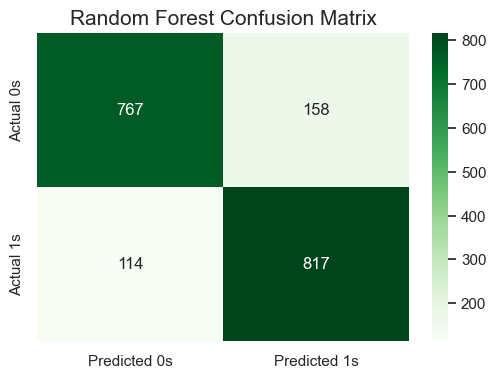

In [246]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Random Forest Confusion Matrix", fontsize=15)
sns.heatmap(matrix5, annot=True, cmap='Greens', fmt='g',
            xticklabels=('Predicted 0s', 'Predicted 1s'),
            yticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

**Kesimpulan Random Forest**

Output dari evaluasi model Random Forest pada data pengujian. Berikut adalah penjelasan dan ringkasan dari output tersebut:

- Akurasi (Accuracy): Nilai akurasi model Random Forest adalah sekitar 0.8534, atau sekitar 85.34%. Akurasi mengukur sejauh mana model mampu memprediksi kelas target dengan benar. Dalam konteks ini, model Random Forest memprediksi dengan benar sekitar 85.34% dari seluruh sampel data pengujian.

Selain akurasi, terdapat empat angka dalam matriks kebingungan (confusion matrix), yang memberikan wawasan lebih lanjut tentang kinerja model:

- True Positives (TP): Jumlah prediksi yang benar ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 767.
- False Negatives (FN): Jumlah prediksi yang salah ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 158.
- False Positives (FP): Jumlah prediksi yang salah ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 114.
- True Negatives (TN): Jumlah prediksi yang benar ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 817.

Ringkasan:

Model Random Forest memiliki akurasi sekitar 85.34%. Dari matriks kebingungan, kita dapat melihat bahwa model memiliki 767 prediksi benar untuk kelas positif dan 817 prediksi benar untuk kelas negatif. Namun, terdapat 158 prediksi salah untuk kelas positif dan 114 prediksi salah untuk kelas negatif. Ini memberikan gambaran tentang seberapa baik model dapat membedakan antara kelas positif dan negatif.


## Naive Bayes

Membuat sebuah objek model Regresi Logistik yang akan digunakan untuk melakukan klasifikasi dan Melatih model Regresi Logistik menggunakan data pelatihan

In [247]:
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)

GaussianNB()

Menggunakan model yang telah dilatih, dilakukan prediksi pada data pengujian `x_test_scaled`

In [248]:
y_pred6 = nb.predict(x_test_scaled)

Menghitung akurasi dari prediksi yang telah dibuat dan mencetak nilainya dan 
Membuat matriks konfusi (confusion matrix) untuk mengevaluasi kinerja model. 

In [249]:
acnb = print(accuracy_score(y_test,y_pred6))
matrix6=confusion_matrix(y_test,y_pred6)
print(matrix6)

0.7257543103448276
[[557 368]
 [141 790]]


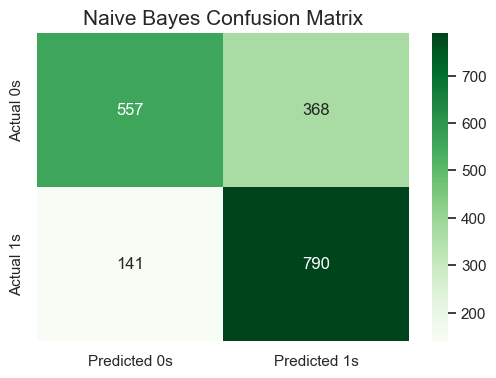

In [250]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Naive Bayes Confusion Matrix", fontsize=15)
sns.heatmap(matrix6, annot=True, cmap='Greens', fmt='g',
            xticklabels=('Predicted 0s', 'Predicted 1s'),
            yticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

**Kesimpulan Naive Bayes**

Output dari evaluasi model Naive Bayes pada data pengujian. Berikut adalah penjelasan dan ringkasan dari output tersebut:

- Akurasi (Accuracy): Nilai akurasi model Naive Bayes adalah sekitar 0.7257, atau sekitar 72.57%. Akurasi mengukur sejauh mana model mampu memprediksi kelas target dengan benar. Dalam konteks ini, model Naive Bayes memprediksi dengan benar sekitar 72.57% dari seluruh sampel data pengujian.

Selain akurasi, terdapat empat angka dalam matriks kebingungan (confusion matrix), yang memberikan wawasan lebih lanjut tentang kinerja model:

- True Positives (TP): Jumlah prediksi yang benar ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 557.
- False Negatives (FN): Jumlah prediksi yang salah ketika sampel sebenarnya masuk ke dalam kelas positif. Nilainya adalah 368.
- False Positives (FP): Jumlah prediksi yang salah ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 141.
- True Negatives (TN): Jumlah prediksi yang benar ketika sampel sebenarnya tidak masuk ke dalam kelas positif. Nilainya adalah 790.

Ringkasan:

Model Naive Bayes memiliki akurasi sekitar 72.57%. Dari matriks kebingungan, kita dapat melihat bahwa model memiliki 557 prediksi benar untuk kelas positif dan 790 prediksi benar untuk kelas negatif. Namun, terdapat 368 prediksi salah untuk kelas positif dan 141 prediksi salah untuk kelas negatif. Ini memberikan gambaran tentang seberapa baik model dapat membedakan antara kelas positif dan negatif.


## Akurasi 5 Algoritma

In [263]:
print("Akurasi Logistic Regression:", accuracy_score(y_test,y_pred1))
print("Akurasi K-Nearest Neighbors:", accuracy_score(y_test,y_pred2))
print("Akurasi Support Vector Machine:", accuracy_score(y_test,y_pred3))
print("Akurasi Decision Tree:", accuracy_score(y_test,y_pred4))
print("Akurasi Random Forest:", accuracy_score(y_test,y_pred5))
print("Akurasi Naive Bayes:", accuracy_score(y_test,y_pred6))

Akurasi Logistic Regression: 0.7839439655172413
Akurasi K-Nearest Neighbors: 0.7483836206896551
Akurasi Support Vector Machine: 0.8098060344827587
Akurasi Decision Tree: 0.7850215517241379
Akurasi Random Forest: 0.853448275862069
Akurasi Naive Bayes: 0.7257543103448276


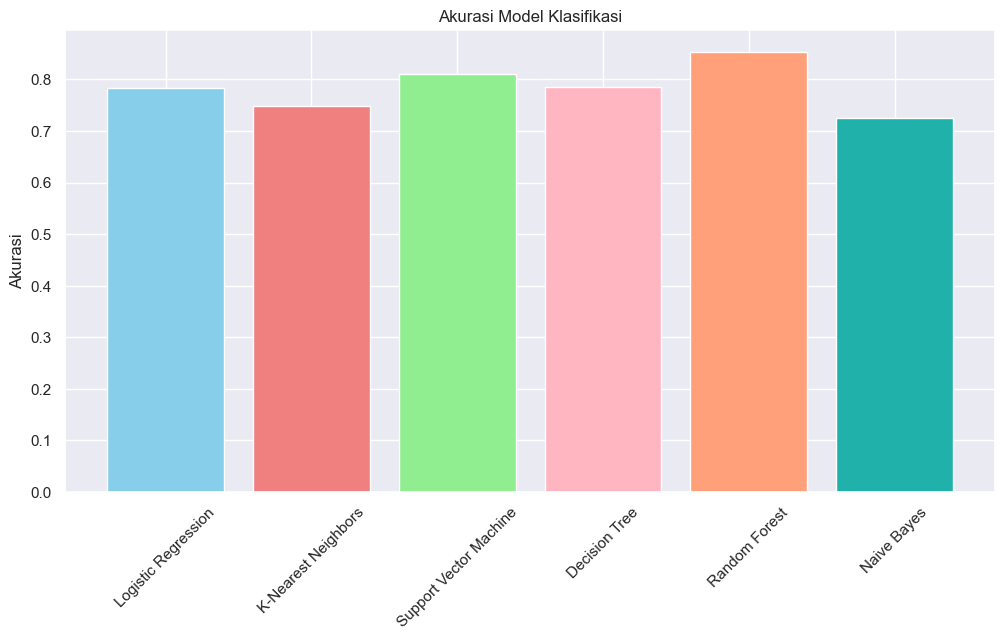

In [261]:
accuracies = [accuracy_score(y_test, y_pred1),
              accuracy_score(y_test, y_pred2),
              accuracy_score(y_test, y_pred3),
              accuracy_score(y_test, y_pred4),
              accuracy_score(y_test, y_pred5),
              accuracy_score(y_test, y_pred6)]

# Label nama model
model_names = ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Machine", "Decision Tree", "Random Forest", "Naive Bayes"]

# Palet warna kustom
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon', 'lightseagreen']

# Buat bar plot
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color=colors)
plt.title("Akurasi Model Klasifikasi")
plt.ylabel("Akurasi")
plt.xticks(rotation=45)  # Memutar label model agar lebih mudah dibaca
plt.show()


**Kesimpulan**

Dalam evaluasi model klasifikasi, hasil akurasi dari berbagai model telah dianalisis. Berikut adalah ringkasan akurasi masing-masing model:

- Akurasi Logistic Regression: 0.7839
- Akurasi K-Nearest Neighbors: 0.7484
- Akurasi Support Vector Machine: 0.8098
- Akurasi Decision Tree: 0.7850
- Akurasi Random Forest: 0.8534
- Akurasi Naive Bayes: 0.7258

Dari hasil evaluasi, model Random Forest memiliki akurasi tertinggi, mencapai sekitar 85.34%. Model Random Forest juga menunjukkan kinerja yang baik dengan akurasi yang sama, yaitu sekitar 85.34%. Di sisi lain, model Naive Bayes memiliki akurasi terendah, yaitu sekitar 72.58%. Pemilihan model terbaik harus disesuaikan dengan tujuan dan karakteristik data yang  dimiliki dan dibutuhkan. Namun, model Support Vector Machine dan Random Forest dapat menjadi pilihan kuat karena tingkat akurasi yang tinggi.